 #                                                  # Vehicle Data Analysis using Python

In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#Importing and Reading Data

df = pd.read_csv("FEV-data-Excel.xlsx - Auta elektryczne.csv")

In [5]:
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [6]:
#Checking for Null Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          52 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


In [7]:
#Filling Null Values

df['Type of brakes'].fillna('Unknown',inplace=True)
df['Permissable gross weight [kg]'].fillna(df['Permissable gross weight [kg]'].median(), inplace=True) #Median_Imputation

In [8]:
df['Maximum load capacity [kg]'].fillna(df['Maximum load capacity [kg]'].median(), inplace=True) #Median_Imputation
df['Boot capacity (VDA) [l]'].fillna(df['Boot capacity (VDA) [l]'].mode(), inplace=True) #Mode_Imputation
df['Acceleration 0-100 kph [s]'].fillna(df['Acceleration 0-100 kph [s]'].median(), inplace=True) #Median_Imputation
df['mean - Energy consumption [kWh/100 km]'].fillna(df['mean - Energy consumption [kWh/100 km]'].mean(), inplace=True) #Mean_Imputation

In [9]:
df.info() #Verifying imputations
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Car full name                           53 non-null     object 
 1   Make                                    53 non-null     object 
 2   Model                                   53 non-null     object 
 3   Minimal price (gross) [PLN]             53 non-null     int64  
 4   Engine power [KM]                       53 non-null     int64  
 5   Maximum torque [Nm]                     53 non-null     int64  
 6   Type of brakes                          53 non-null     object 
 7   Drive type                              53 non-null     object 
 8   Battery capacity [kWh]                  53 non-null     float64
 9   Range (WLTP) [km]                       53 non-null     int64  
 10  Wheelbase [cm]                          53 non-null     float64


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.450000
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.800000
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.550000
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.300000
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.850000
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95.0,369,...,3130.0,565.0,5,5,20,210,615.0,4.5,150,27.200000
6,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),42.2,359,...,1730.0,440.0,4,5,19,160,260.0,8.1,50,13.100000
7,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),42.2,345,...,1730.0,440.0,4,5,20,160,260.0,6.9,50,14.300000
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.800000
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,18.994318


In [10]:
PLN_threshold = 350000
min_range = 400
Filtered_EVs = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
Filtered_EVs

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.450000
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.800000
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.400000
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.900000
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.700000
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.850000
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,2119.0,486.0,5,5,18,225,425.0,5.6,150,18.994318
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,2119.0,486.0,5,5,18,233,425.0,4.4,150,18.994318
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,2119.0,486.0,5,5,20,261,425.0,3.3,150,18.994318
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.400000


In [11]:
Groups = Filtered_EVs.groupby('Make')
Group_Size = Groups.size()
print(Group_Size)

Capacity = round(Groups['Battery capacity [kWh]'].mean(),2)
Capacity

Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
dtype: int64


Make
Audi             95.00
BMW              80.00
Hyundai          64.00
Kia              64.00
Mercedes-Benz    80.00
Tesla            68.00
Volkswagen       70.67
Name: Battery capacity [kWh], dtype: float64

In [12]:
# Define the column to check for outliers

# Calculate Q1, Q3, and IQR
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = round(Q1 - 1.5 * IQR,2)
upper_bound = round(Q3 + 1.5 * IQR,2)
print(lower_bound)
print(upper_bound)

# Identify outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]
print(outliers)

6.98
30.78
Empty DataFrame
Columns: [Car full name, Make, Model, Minimal price (gross) [PLN], Engine power [KM], Maximum torque [Nm], Type of brakes, Drive type, Battery capacity [kWh], Range (WLTP) [km], Wheelbase [cm], Length [cm], Width [cm], Height [cm], Minimal empty weight [kg], Permissable gross weight [kg], Maximum load capacity [kg], Number of seats, Number of doors, Tire size [in], Maximum speed [kph], Boot capacity (VDA) [l], Acceleration 0-100 kph [s], Maximum DC charging power [kW], mean - Energy consumption [kWh/100 km]]
Index: []

[0 rows x 25 columns]


In [13]:
round(df.describe(),2)

,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Battery capacity [kWh],Range (WLTP) [km],Wheelbase [cm],Length [cm],Width [cm],Height [cm],Minimal empty weight [kg],Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,52.00,53.00,53.00,53.00
mean,246158.51,269.77,460.04,62.37,376.91,273.58,442.51,186.24,155.42,1868.45,2263.21,515.26,4.91,4.85,17.68,178.17,445.10,7.38,113.51,18.99
std,149187.49,181.30,261.65,24.17,118.82,22.74,48.86,14.28,11.28,470.88,516.76,130.01,0.84,0.46,1.87,43.06,180.18,2.71,57.17,4.02
min,82050.00,82.00,160.00,17.60,148.00,187.30,269.50,164.50,137.80,1035.00,1310.00,290.00,2.00,3.00,14.00,123.00,171.00,2.50,22.00,13.10
25%,142900.00,136.00,260.00,40.00,289.00,258.80,411.80,178.80,148.10,1530.00,1970.00,445.00,5.00,5.00,16.00,150.00,315.00,5.10,100.00,15.90
50%,178400.00,204.00,362.00,58.00,364.00,270.00,447.00,180.90,155.60,1685.00,2119.00,486.00,5.00,5.00,17.00,160.00,425.00,7.70,100.00,18.00
75%,339480.00,372.00,640.00,80.00,450.00,290.00,490.10,193.50,161.50,2370.00,2725.00,565.00,5.00,5.00,19.00,200.00,558.00,9.00,150.00,21.85
max,794000.00,772.00,1140.00,100.00,652.00,327.50,514.00,255.80,191.00,2710.00,3500.00,1056.00,8.00,5.00,21.00,261.00,870.00,13.10,270.00,28.20


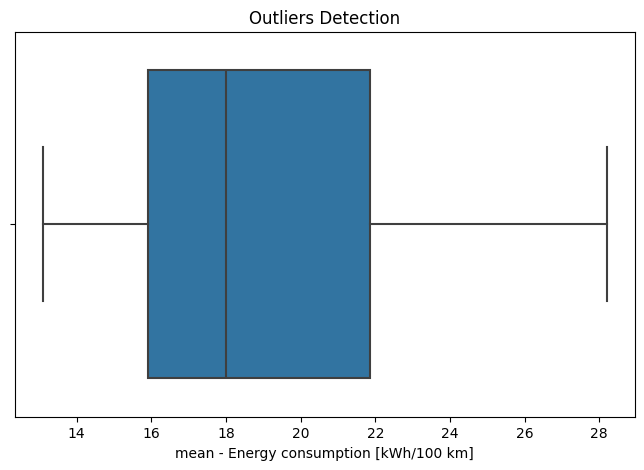

In [14]:
plt.figure(figsize=(8,5))
sb.boxplot(x=df['mean - Energy consumption [kWh/100 km]'])
plt.title("Outliers Detection")
plt.show()

# Min & Max values found to be in between the range of lower bound and upper bound 
# Therefore, No Outliers detected in the data

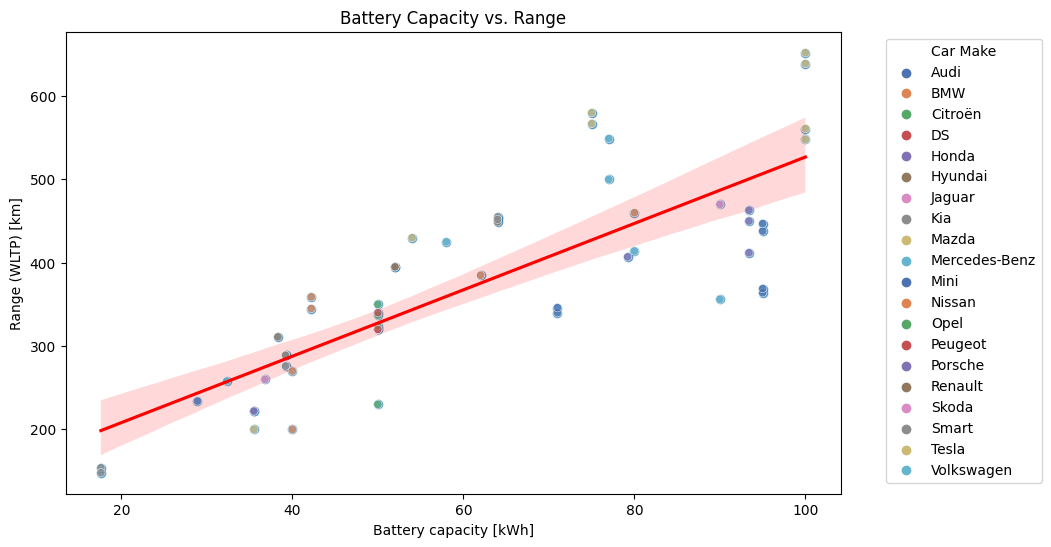

In [15]:
plt.figure(figsize=(10, 6))
sb.regplot(data=df, x=df['Battery capacity [kWh]'], y='Range (WLTP) [km]', scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
sb.scatterplot(data=df, x=df['Battery capacity [kWh]'], y=df['Range (WLTP) [km]'], hue="Make", palette="deep", alpha=0.7,sizes=(20, 100))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Car Make")

plt.title('Battery Capacity vs. Range')
plt.show()

# The Scatter plot above shows that there is moderate to strong "Positive" correlation between Battery Capacity and Range

In [16]:
class EVRecommender:
    def __init__(self,data):
        self.df = data

    def recommend(self,budget,min_range,min_battery):
        Filtered_EVS = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)]
        return Filtered_EVS.sort_values(by='Range (WLTP) [km]') \
               if not Filtered_EVS.empty else "No matching EVs found."

budget = int(input("Enter your Budget[PLN]: "))
min_range = int(input("Enter the desired minimum range[KMs]: "))
min_battery = int(input("Enter the desired battery capacity[KWh]: "))

EV_Recommender = EVRecommender(df)
recommendations = EV_Recommender.recommend(budget,min_range,min_battery)
pivot_table = recommendations.pivot_table(index="Make",values=["Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"], 
aggfunc="mean").head(3)

print(pivot_table)

Enter your Budget[PLN]:  400000
Enter the desired minimum range[KMs]:  250
Enter the desired battery capacity[KWh]:  50


         Battery capacity [kWh]  Minimal price (gross) [PLN]  \
Make                                                           
Audi                       83.0                     332700.0   
BMW                        80.0                     282900.0   
Citroën                    50.0                     125000.0   

         Range (WLTP) [km]  
Make                        
Audi                392.75  
BMW                 460.00  
Citroën             350.00  


In [27]:
import scipy.stats as stats

tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

t_stat, p_value = stats.ttest_ind(tesla_power, audi_power, equal_var=False)  # Welch’s t-test

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in engine power between Tesla and Audi.")
else:
    print("Fail to reject the null hypothesis: No significant difference in engine power between Tesla and Audi.")

T-Statistic: 1.7940
P-Value: 0.1068
Fail to reject the null hypothesis: No significant difference in engine power between Tesla and Audi.


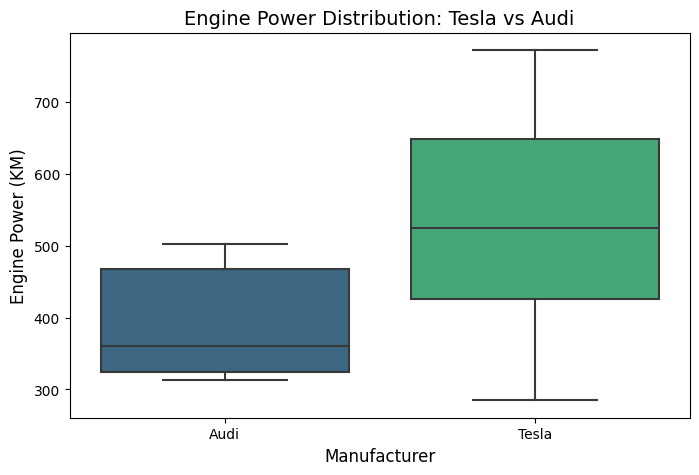

In [19]:
# Filter data for Tesla and Audi
df_filtered = df[df['Make'].isin(['Tesla', 'Audi'])]

# Create Boxplot
plt.figure(figsize=(8, 5))
sb.boxplot(data=df_filtered, x="Make", y="Engine power [KM]", palette="viridis")

# Titles and Labels
plt.title("Engine Power Distribution: Tesla vs Audi", fontsize=14)
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Engine Power (KM)", fontsize=12)

# Show the Plot
plt.show()

In [31]:
print(f"Tesla Mean Power: {tesla_power.mean()}")
print(f"Audi Mean Power: {audi_power.mean()}")


Tesla Mean Power: 533.0
Audi Mean Power: 392.0


In [33]:
print("Tesla Median:", tesla_power.median())
print("Audi Median:", audi_power.median())

Tesla Median: 525.0
Audi Median: 360.0


# Statistically, the p-value came out to be 0.1068 showcasing no significant difference in Engine powers of two brands.
# To verify this practically, boxplot visualization was used which shows Tesla's Average Engine powers are higher than that of Audi's.
# The reason behind this differences is small sample size i.e. the provided data is too small to test it statistically and can't be relied on it at the same time.
# The difference between the means and medians are also the proofs that Tesla's Avg engine power is significantly higher which is depicted in the boxplot